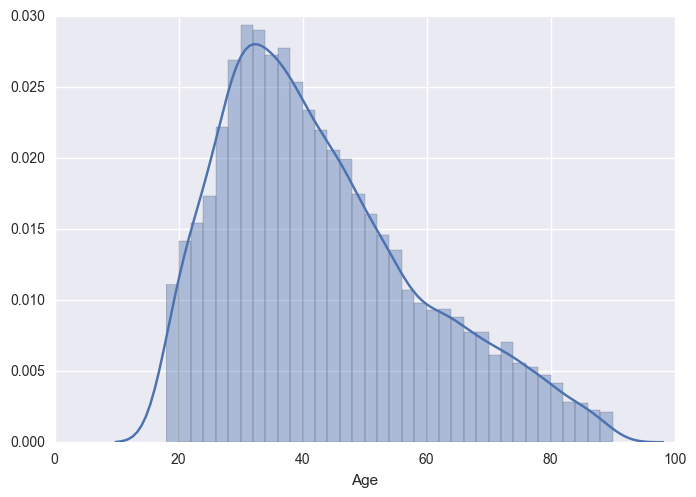

In [14]:
%matplotlib inline
from pandas import read_csv, DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

data = read_csv('drivers.txt')

sns.distplot(data.Age, label="Age")

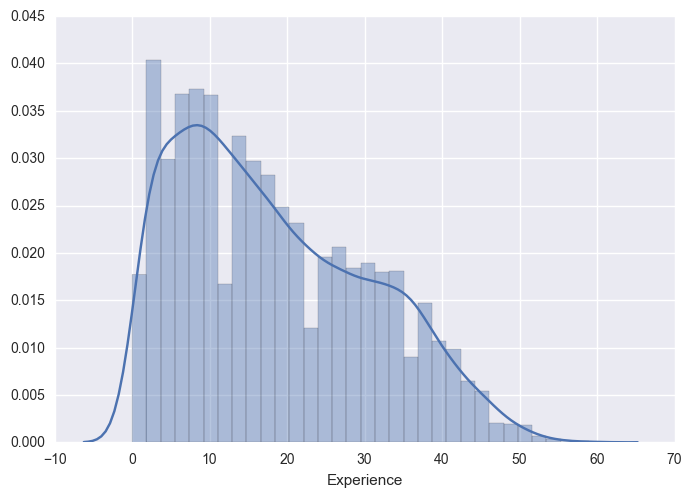

In [15]:
sns.distplot(data.Experience)

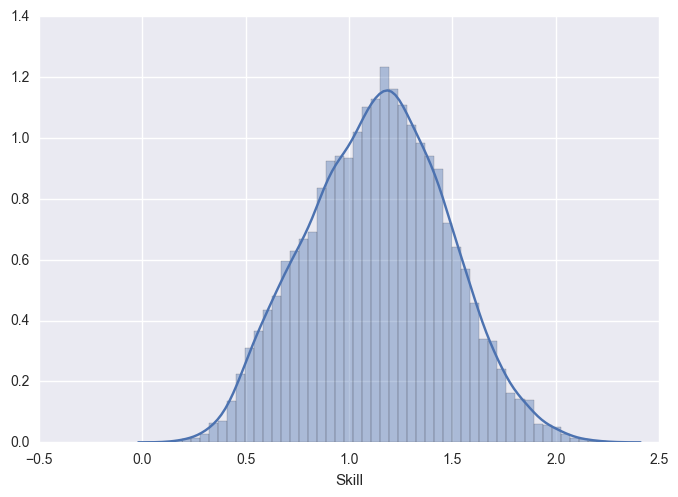

In [16]:
sns.distplot(data.Skill)

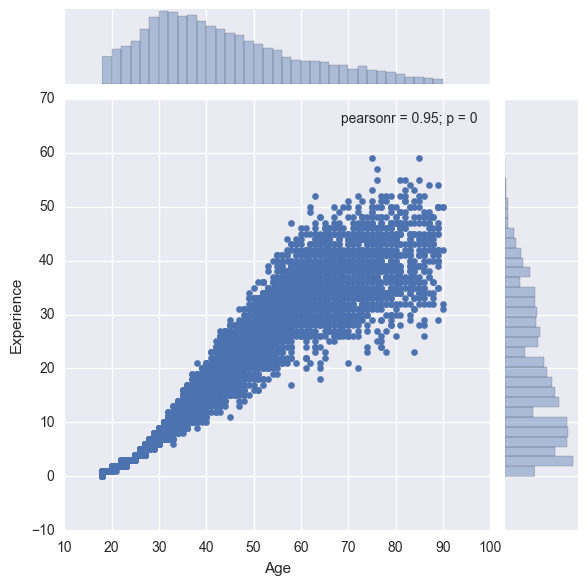

In [8]:
sns.jointplot(x="Age", y="Experience", data=data);

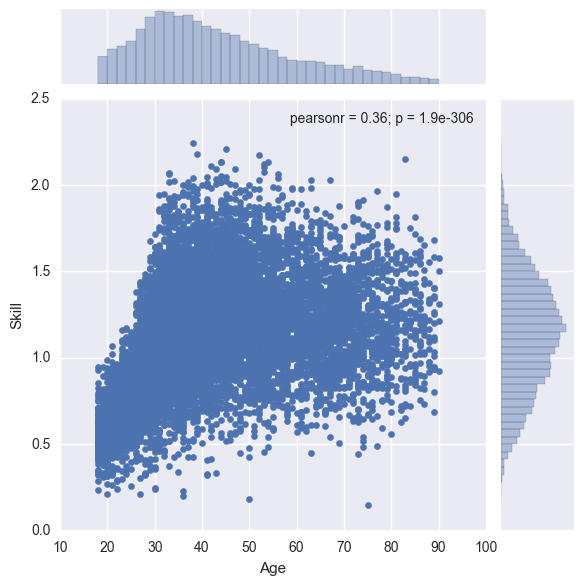

In [9]:
sns.jointplot(x="Age", y="Skill", data=data);

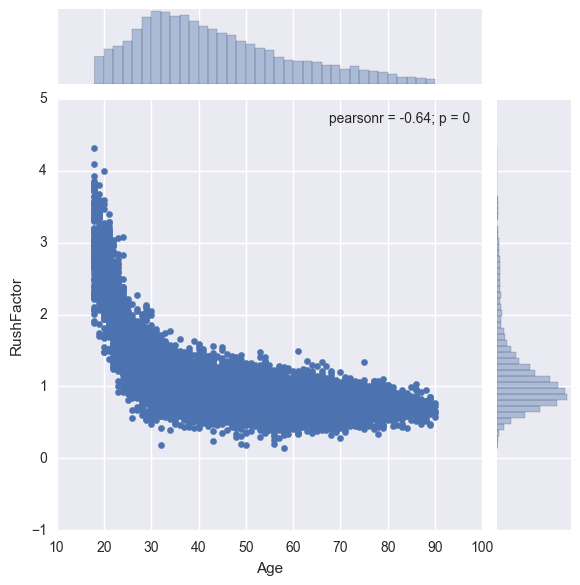

In [10]:
sns.jointplot(x="Age", y="RushFactor", data=data);

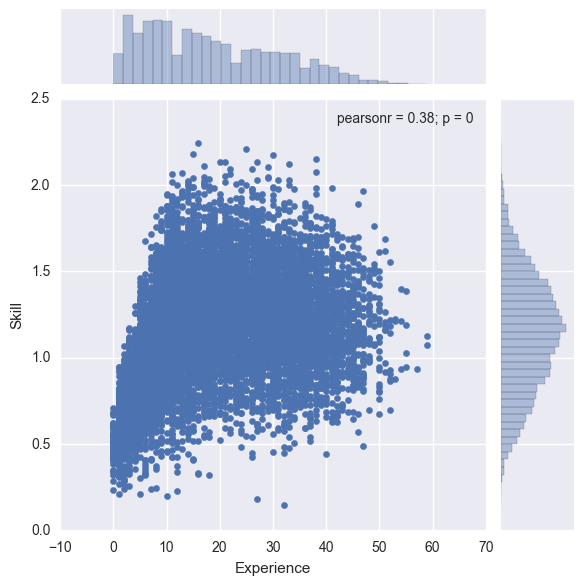

In [11]:
sns.jointplot(x="Experience", y="Skill", data=data);

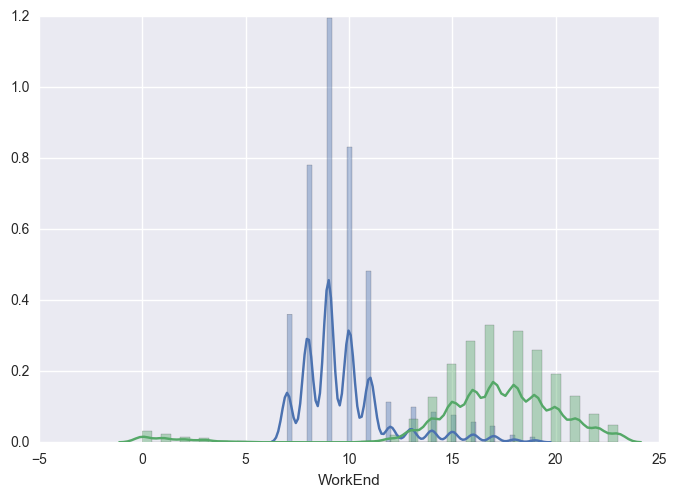

In [17]:
sns.distplot(data.WorkStart, label="Work start")
sns.distplot(data.WorkEnd, label="Work end")

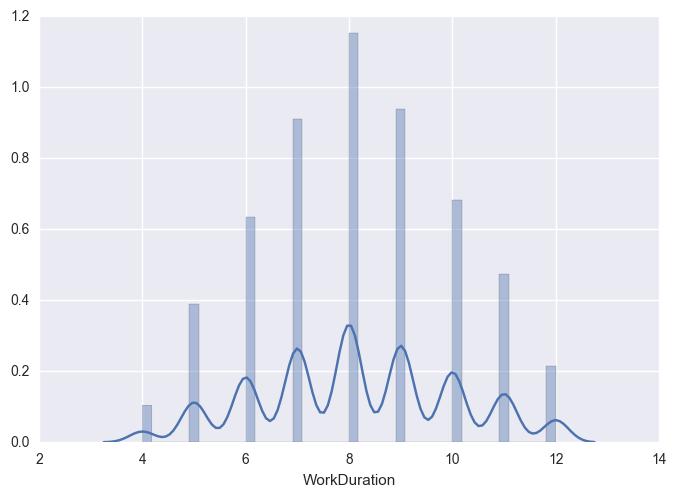

In [18]:
sns.distplot(data.WorkDuration, label="Work duration")